# Problem 2
Authors: Fabian Boemer, Sid Murching, Suraj Nair, Alex Cui

In [ ]:
import requests
url_dict = {
    'train.txt': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/set5/data/train.txt',
    'test.txt': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/set5/data/test.txt'
}
def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

# Download files
download_file('train.txt')
download_file('test.txt')

Start downloading...
Complete
Start downloading...
Complete


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 2C:
Fill in these functions to train your SVD

In [ ]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    grad = reg*Ui - Vj*(Yij - np.matmul(Vj,Ui))
    return eta * grad

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    grad = reg*Vj - Ui*(Yij - np.matmul(Vj,Ui))
    return eta * grad

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err_total = 0
    for i, j, Yij in Y:
        err = 0.5*(Yij - np.dot(U[i - 1], V[j - 1]))**2
        err_total += err
    return err_total/len(Y)

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    n = Y.shape[0]
    U = np.random.uniform(-0.5, 0.5, size=(M, K))
    V = np.random.uniform(-0.5, 0.5, size=(N, K))
    prev_err = get_err(U, V, Y, reg)
    first_err = prev_err
    for k in range(max_epochs):
      indices = np.random.permutation(n)
      Y_shuffled = Y[indices]
      for i, j, Yij in Y_shuffled:
        dU = grad_U(U[i - 1], Yij, V[j - 1], reg, eta)
        U[i - 1] -= dU
        dV = grad_V(V[j - 1], Yij, U[i - 1], reg, eta)
        V[j - 1] -= dV
      err = get_err(U, V, Y_shuffled, reg)
      if k == 0:
        first_err = err - prev_err
      else:
        expr = (err - prev_err)/first_err
        if expr <= eps:
          return U, V, err
        prev_err = err
    return U, V, err

## 2D:
Run the cell below to get your graphs

Factorizing with  943  users,  1682  movies.


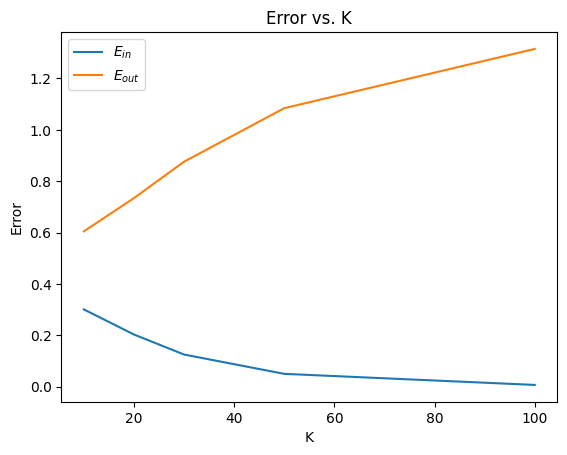

In [ ]:
Y_train = np.loadtxt('/content/train.txt').astype(int)
Y_test = np.loadtxt('/content/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]

reg = 0.0
eta = 0.03 # learning rate
E_in = []
E_out = []

# Use to compute Ein and Eout
for K in Ks:
    U,V, err = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test))

plt.plot(Ks, E_in, label='$E_{in}$')
plt.plot(Ks, E_out, label='$E_{out}$')
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

## 2E:
Run the cell below to get your graphs. This might take a long time to run, but it should take less than 2 hours. I would encourage you to validate your 2C is correct.

Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 30, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 100, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.001
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
Training model with M = 943, N = 1682, k = 30, eta = 0.03, reg = 0.001
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 0.001
Training model with M = 943, N = 1682, k = 100, eta = 0.03, reg = 0.001
Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.01
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01
Training model with M = 943, N = 1682, k = 30, eta = 0.03, reg = 0.01
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 0.01
Tra

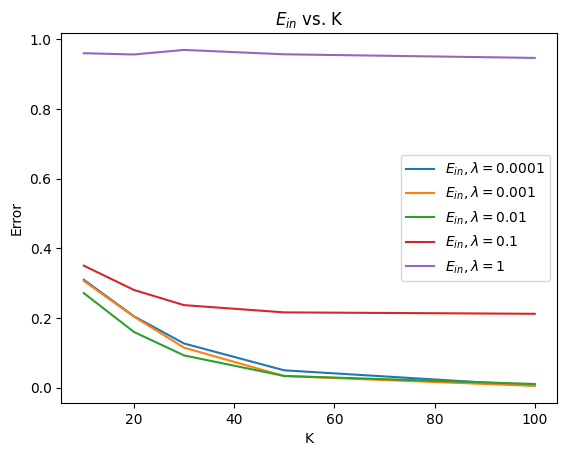

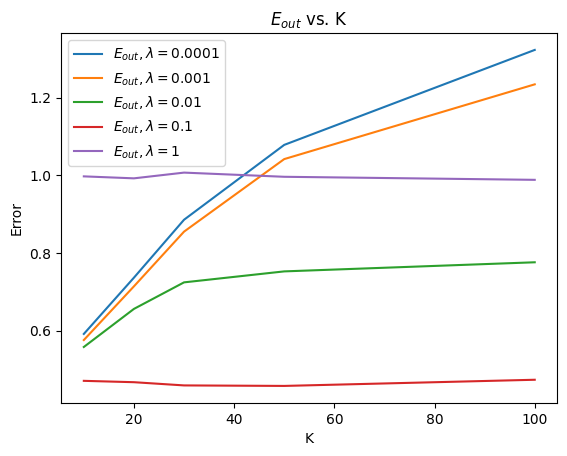

In [ ]:
Y_train = np.loadtxt('/content/train.txt').astype(int)
Y_test = np.loadtxt('/content/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
Ks = [10,20,30,50,100]

regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for k in Ks:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, k, eta, reg))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_ein.png')
plt.show()
plt.clf()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_eout.png')
plt.show()